### Importing packages

#### Others

In [1]:
# Used to read the data file
import pandas as pd

# Used in the definition of the model and its initial condition
import numpy as np

# Used for plots other than those generated by the parameter estimation module
import matplotlib.pyplot as plt
%matplotlib inline

#### The module itself

In [2]:
import PDEparams as pde

### Defining the model

We use a classic two-species predator-prey model:

$$\begin{align}
\frac{\mathrm{d} x}{\mathrm{d} t} &= a\, x(1-x)-b\,x\,y\\
\frac{\mathrm{d} y}{\mathrm{d} t} &= b\,x\,y-y
\end{align}$$

Note that the arguments below do not include a spatial grid, since we are dealing with ODEs.

In [3]:
def LotkaVolterra(z, t, a, b):
    '''The input z corresponds to the current state of the system, z = [x, y]. Since the input is in 1D, no 
    pre-processing is needed.
    
    t is the current time.
    
    a and b correspond to the unknown parameters.
    '''
    
    x, y = z
    
    return [a*x*(1-x)-b*x*y, b*x*y-y]

Here we specify the functions that define the initial condition for each variable. Since there is no spatial dependence, the initial functions don't take any arguments and return a constant value. The initial condition used for data generation corresponds to $(x,y)=(0.3,0.5)$

In [4]:
def initial_x():
    return 0.3

def initial_y():
    return 0.5

### Using `PDEparams` to estimate parameters

First, we load the data from the `.csv` file.

The data consist of 3 replicates, and have been generated using parameter values $a=3$, $b=1$.

The columns are, in order: $t$, $x$, $y$.

In [5]:
df = pd.read_csv('LotkaVolterraData.csv')

df.head()

,0,1,2
0,0.060606,0.325940,0.469672
1,0.060606,0.326474,0.475169
2,0.060606,0.317529,0.486987
3,0.070707,0.340549,0.492719
4,0.070707,0.324513,0.470383


#### Constructing the `PDEmodel` object.

The inputs are

**Required:**
1. The data table `df`.
2. The model `LotkaVolterra`.
3. The list of initial condition functions.
4. The bounds for the parameter values.

**Optional:**
1. The parameter names.
2. The number of variables: 2. **(Default is 1, this needs to be provided in this case)**
3. The number of spatial dimensions: 0. **(Default is 1, this needs to be provided in this case)**
4. The number of replicates in the data: 3. **(Default is 1, this needs to be provided in this case)**
5. The indices of the measured variables. In this case, the default `None`, since we have data for all 2 variables.
6. The function to apply to the output. In this case, the default `None`, since our data is directly $x$ and $y$.

In [6]:
my_model = pde.PDEmodel(df, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                        param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=None)

In [7]:
# Printing the initial condition
my_model.initial_condition

array([0.3, 0.5])

#### Finding the best fit parameters.

In [8]:
%%time
my_model.fit()

        $a$       $b$
0  2.993904  1.001379
CPU times: user 279 ms, sys: 1.73 ms, total: 280 ms
Wall time: 290 ms


In [9]:
my_model.best_params

,$a$,$b$
0,2.993904,1.001379


In [10]:
my_model.best_error

9.413324634610873e-05

#### Likelihood profiles

We use the default grid of 100 points per parameter.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below. 

In [11]:
%%time
my_model.likelihood_profiles()


CPU times: user 32.8 s, sys: 114 ms, total: 33 s
Wall time: 36.3 s


The raw results

In [12]:
my_model.result_profiles

,parameter,value,error
0,$a$,2.000000,0.003617
1,$a$,2.020202,0.003437
2,$a$,2.040404,0.003264
3,$a$,2.060606,0.003099
4,$a$,2.080808,0.002942
5,$a$,2.101010,0.002792
6,$a$,2.121212,0.002649
7,$a$,2.141414,0.002513
8,$a$,2.161616,0.002385
9,$a$,2.181818,0.002263


Visualisation

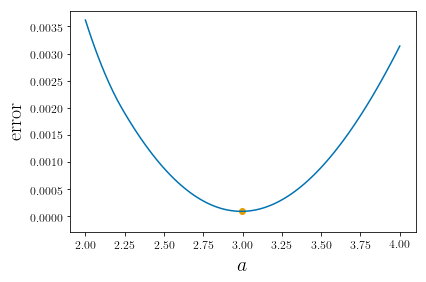

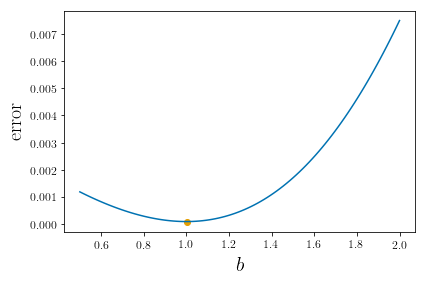

In [13]:
my_model.plot_profiles()

#### Bootstrapping

We use the default 100 repetitions.

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [14]:
%%time
my_model.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.990633    0.999784
std      0.010713    0.007454
min      2.965644    0.982297
25%      2.983347    0.995204
50%      2.990437    0.999729
75%      2.997088    1.003723
max      3.025524    1.020776
CPU times: user 26.9 s, sys: 46.2 ms, total: 27 s
Wall time: 30 s


The summary

In [15]:
my_model.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.990633,0.999784
std,0.010713,0.007454
min,2.965644,0.982297
25%,2.983347,0.995204
50%,2.990437,0.999729
75%,2.997088,1.003723
max,3.025524,1.020776


The raw results

In [16]:
my_model.bootstrap_raw

,$a$,$b$
0,3.003469,1.018804
1,3.001168,1.010144
2,2.987095,0.992268
3,2.984709,1.002661
4,2.978693,0.997317
5,2.985765,0.986396
6,2.987959,1.001987
7,2.993803,1.008941
8,2.999806,0.995116
9,2.991132,0.988603


Visualisation

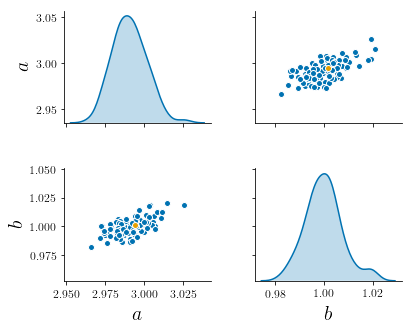

In [17]:
my_model.plot_bootstrap()

### Only one observed variable

Let us suppose now that we only have data for $y$.

In [18]:
df2 = df[df.columns[[0,2]]] # x, which we are ignoring, is column 1 in the data table

df2.head()

,0,2
0,0.060606,0.469672
1,0.060606,0.475169
2,0.060606,0.486987
3,0.070707,0.492719
4,0.070707,0.470383


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df2` instead of `df`&mdash;and `obsidx`, which specifies that we only have data for the 2nd variable in the system. Starting from zero, the corresponding index is 1. Since we only have one observed variable, `obsidx` can be either a number or a list of one element.

In [19]:
my_model2 = pde.PDEmodel(df2, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=[1], outfunc=None)

#### Finding the best fit parameters.

In [20]:
%%time
my_model2.fit()

       $a$       $b$
0  2.83873  1.029909
CPU times: user 176 ms, sys: 25 µs, total: 176 ms
Wall time: 179 ms


In [21]:
my_model2.best_params

,$a$,$b$
0,2.83873,1.029909


In [22]:
my_model2.best_error

9.187040918800129e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [23]:
%%time
my_model2.likelihood_profiles()


CPU times: user 43.7 s, sys: 104 ms, total: 43.8 s
Wall time: 49.7 s


The raw results

In [24]:
my_model2.result_profiles

,parameter,value,error
0,$a$,2.000000,0.000102
1,$a$,2.020202,0.000101
2,$a$,2.040404,0.000101
3,$a$,2.060606,0.000100
4,$a$,2.080808,0.000100
5,$a$,2.101010,0.000099
6,$a$,2.121212,0.000099
7,$a$,2.141414,0.000098
8,$a$,2.161616,0.000098
9,$a$,2.181818,0.000097


Visualisation

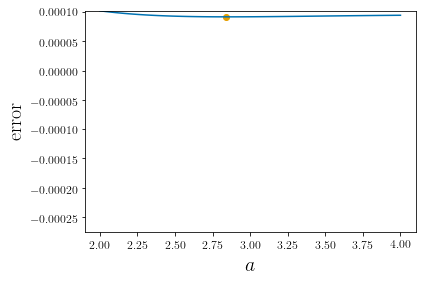

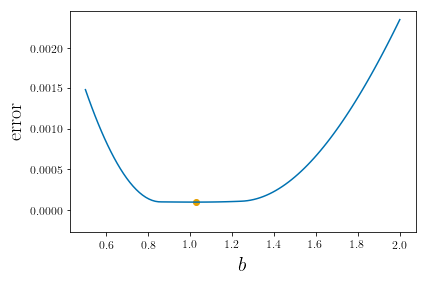

In [25]:
my_model2.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [26]:
%%time
my_model2.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     2.928028    1.017756
std      0.401623    0.070162
min      2.151616    0.851199
25%      2.641515    0.968889
50%      2.817236    1.029071
75%      3.133648    1.065381
max      3.994846    1.196032
CPU times: user 22.4 s, sys: 118 ms, total: 22.5 s
Wall time: 25.2 s


The summary

In [27]:
my_model2.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,2.928028,1.017756
std,0.401623,0.070162
min,2.151616,0.851199
25%,2.641515,0.968889
50%,2.817236,1.029071
75%,3.133648,1.065381
max,3.994846,1.196032


The raw results

In [28]:
my_model2.bootstrap_raw

,$a$,$b$
0,3.186450,0.966881
1,2.994018,0.992822
2,2.229250,1.172231
3,2.736436,1.045355
4,3.459128,0.931309
5,2.771381,1.040382
6,2.934312,1.002232
7,2.734665,1.056124
8,3.028957,0.992229
9,2.466829,1.098155


Visualisation

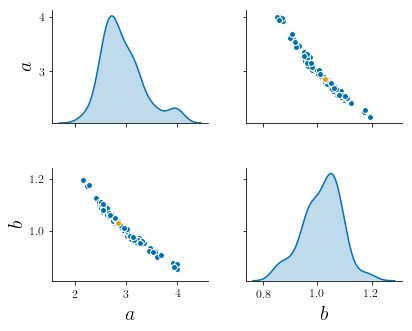

In [29]:
my_model2.plot_bootstrap()

### Only a function of the variables is observed

Finally, we consider the case when it's not the raw outputs of the system that are observed, but rather a function of them. In this case, let us assume that the observed quantity is

$$\mathcal{F}(x, y) = x\,y$$

In [30]:
df3 = df[df.columns[[0]]] # we take only the time-points

# We add the new function
df3[r'$\mathcal{F}$'] = df['1']*df['2'] # x and y are, respectively, columns 1 and 2 in the data table

df3.head()

,0,$\mathcal{F}$
0,0.060606,0.153085
1,0.060606,0.155130
2,0.060606,0.154632
3,0.070707,0.167795
4,0.070707,0.152645


#### Constructing the `PDEmodel` object.

The inputs are the same as before, except for the data&mdash;now `df3`&mdash;and `outfunc`, which specifies the function to be applied to the outputs before computing the error.

In [31]:
def F(z):
    x, y = z
    
    return x*y

In [32]:
my_model3 = pde.PDEmodel(df3, LotkaVolterra, [initial_x, initial_y], bounds=[(2, 4), (0.5,2)], 
                         param_names=[r'$a$', r'$b$'], nvars=2, ndims=0, nreplicates=3, obsidx=None, outfunc=F)

#### Finding the best fit parameters.

In [33]:
%%time
my_model3.fit()

        $a$       $b$
0  3.013358  0.962529
CPU times: user 1.16 s, sys: 4.47 ms, total: 1.16 s
Wall time: 1.47 s


In [34]:
my_model3.best_params

,$a$,$b$
0,3.013358,0.962529


In [35]:
my_model3.best_error

4.443543597892799e-05

#### Likelihood profiles

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [36]:
%%time
my_model3.likelihood_profiles()


CPU times: user 2min 5s, sys: 234 ms, total: 2min 5s
Wall time: 2min 24s


The raw results

In [37]:
my_model3.result_profiles

,parameter,value,error
0,$a$,2.000000,0.002442
1,$a$,2.020202,0.002340
2,$a$,2.040404,0.002239
3,$a$,2.060606,0.002140
4,$a$,2.080808,0.002043
5,$a$,2.101010,0.001948
6,$a$,2.121212,0.001854
7,$a$,2.141414,0.001763
8,$a$,2.161616,0.001674
9,$a$,2.181818,0.001587


Visualisation

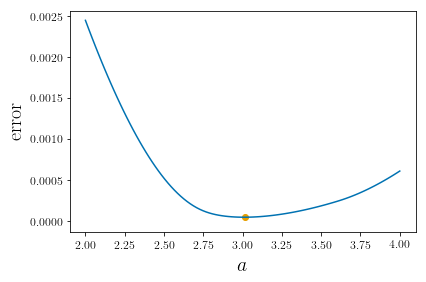

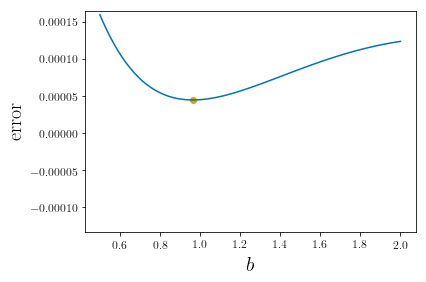

In [38]:
my_model3.plot_profiles()

#### Bootstrapping

**Note:** if you see a "widget not found" message, just ignore it; a progress bar will appear when you run the cell below.

In [39]:
%%time
my_model3.bootstrap()


              $a$         $b$
count  100.000000  100.000000
mean     3.010285    0.965811
std      0.019293    0.030561
min      2.963211    0.892835
25%      2.998660    0.946928
50%      3.009469    0.967059
75%      3.021914    0.985858
max      3.060564    1.053666
CPU times: user 46.2 s, sys: 71.1 ms, total: 46.3 s
Wall time: 51.7 s


The summary

In [40]:
my_model3.bootstrap_summary

,$a$,$b$
count,100.000000,100.000000
mean,3.010285,0.965811
std,0.019293,0.030561
min,2.963211,0.892835
25%,2.998660,0.946928
50%,3.009469,0.967059
75%,3.021914,0.985858
max,3.060564,1.053666


The raw results

In [41]:
my_model3.bootstrap_raw

,$a$,$b$
0,3.004544,0.975553
1,3.011460,0.944719
2,3.022243,0.956418
3,3.041521,0.945383
4,3.033754,0.943021
5,3.008854,0.952098
6,3.004783,0.966086
7,3.021300,0.984676
8,2.993500,0.981311
9,3.001813,0.992382


Visualisation

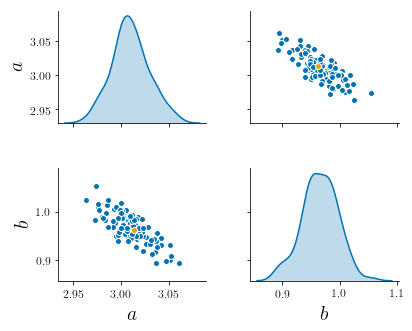

In [42]:
my_model3.plot_bootstrap()